# Imports

In [126]:
from importlib import reload
import functions as f

# for data handling
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [127]:
# General

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [128]:
# Regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# Ridge(alpha=a, normalize=True)
from sklearn.linear_model import Lasso
# Lasso(alpha = alpha[i], normalize=True, max_iter = 1000000)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [129]:
# Classification

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# tree_clf = DecisionTreeClassifier(max_depth = 3)
# fig = tree_clf.fit(X, y)
# tree.plot_tree(fig,filled = True)
# plt.show()
# tree_clf.predict_proba(X)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.svm import LinearSVC # LinearSVC(C=1, loss="hinge")
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=5)
# neigh.fit(X,y)

In [130]:
# Unsupervised learning

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# pca.explained_variance_ratio_
# plt.matshow(pca_pipe['pca'].components_, cmap = 'plasma')

from sklearn.manifold import MDS
# mds = MDS(n_components = 2)
# X_mds = mds.fit_transform(X)

from sklearn.manifold import LocallyLinearEmbedding
# lle = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
# X_lle = lle.fit_transform(X)

from sklearn.manifold import Isomap
# iso = Isomap(n_neighbors=160, n_components=2)
# X_iso = iso.fit_transform(X)

from sklearn.manifold import TSNE
# tsne = TSNE(n_components = 2, perplexity=50)
# X_tsne = tsne.fit_transform(X)

In [131]:
# For reloading our functions library if anything is changed
f = reload(f)

# Work

## Time

Checking these are all blitz-like

In [132]:
import json

game_dicts = json.load(open('rosen_russian.json'))

In [133]:
times = [game_dict['time_control'] for game_dict in game_dicts]

In [9]:
set(times)

{'180+0',
 '180+2',
 '180+3',
 '180+5',
 '240+0',
 '240+2',
 '300+0',
 '300+1',
 '300+2',
 '300+3',
 '300+4',
 '420+1'}

## Importing Data

In [134]:
df = pd.read_csv('rosen_russian.csv')
df_copy = df.copy()

In [135]:
# Simplify the white player labels
for i in range(len(df_copy)):
    name = df_copy['white_player'].at[i]
    if name == 'EricRosen':
        df_copy['white_player'].at[i] = 'Rosen'
    elif name == 'RussianBlizzard':
        df_copy['white_player'].at[i] = 'Russian'
    else:
        df_copy['white_player'].at[i] = 'Other'

In [14]:
df_copy.sample(10)

,game_id,white_player,wn_pair,wn_outpost,wn_repositioning,wn_mobility,wb_pair,wk_side_fianchetto,wq_side_fianchetto,wb_mobility,...,num_direct_trades,num_indirect_trades,num_direct_trades_white,num_indirect_trades_white,avg_time_between_direct_trade,exchanges_possible,king_squares_attacked,king_moves,king_moves_weighted,distance_from_king
814,https://lichess.org/7MO9C6zK,Other,0,0.000,0.000000,3.105263,0,0,0,3.631579,...,2,0,0,0,1.5,0.375000,1.210526,1,38,3.538662
1213,https://lichess.org/BNGvNoRy,Russian,0,0.000,0.000000,0.375000,0,0,0,2.562500,...,2,0,1,0,1.0,0.150000,0.062500,0,0,3.583288
1795,https://lichess.org/JiVn1Dec,Other,0,0.000,0.036806,2.875000,0,0,0,3.900000,...,7,0,6,0,1.0,0.833333,0.000000,0,0,3.504067
579,https://lichess.org/0elLvrOl,Rosen,0,0.000,0.007819,0.000000,1,1,0,2.759259,...,6,0,1,0,1.2,0.680000,0.629630,1,21,3.651400
203,https://lichess.org/tWMNsjSQ,Other,0,0.125,0.059669,2.125000,0,0,0,2.687500,...,5,0,1,0,1.5,0.761905,1.000000,0,0,3.382900
1324,https://lichess.org/gnRyGw7N,Russian,0,0.000,0.130709,2.062500,0,0,1,2.484375,...,3,0,3,0,0.0,0.280000,0.343750,1,37,3.288177
1349,https://lichess.org/5saatwQ9,Other,0,0.000,0.071519,1.343750,0,0,0,2.234375,...,1,1,1,1,0.0,0.518519,0.062500,0,0,3.274295
723,https://lichess.org/3VO8Vfjy,Rosen,0,0.000,0.011905,3.214286,0,0,0,3.107143,...,2,0,1,0,1.0,0.562500,0.000000,0,0,3.499686
1816,https://lichess.org/Tek8IiVg,Russian,0,0.000,0.360777,0.961538,1,0,1,3.000000,...,7,0,4,0,1.0,0.481481,0.000000,0,0,3.343125
1242,https://lichess.org/73pDKW8m,Other,0,0.000,0.000000,2.750000,0,0,0,3.078125,...,6,0,3,0,1.0,0.400000,0.343750,0,0,3.478720


In [136]:
# Remove the 'Other' ones
df_copy = df_copy[df_copy['white_player'] != 'Other']
df_copy.sample(10)

,game_id,white_player,wn_pair,wn_outpost,wn_repositioning,wn_mobility,wb_pair,wk_side_fianchetto,wq_side_fianchetto,wb_mobility,...,num_direct_trades,num_indirect_trades,num_direct_trades_white,num_indirect_trades_white,avg_time_between_direct_trade,exchanges_possible,king_squares_attacked,king_moves,king_moves_weighted,distance_from_king
268,https://lichess.org/BRQaCPUF,Rosen,0,0.000000,0.038194,3.333333,0,0,0,1.000000,...,2,0,0,0,1.0,0.300000,0.000000,0,0,3.554334
488,https://lichess.org/4LJjBVmJ,Rosen,0,0.200000,0.136607,2.440000,0,0,0,1.566667,...,3,0,2,0,1.0,0.382979,1.586667,5,158,2.898468
758,https://lichess.org/qUXdgFTk,Rosen,0,0.000000,0.180115,2.738095,0,0,0,3.904762,...,8,0,6,0,1.0,0.357143,0.857143,0,0,3.023698
102,https://lichess.org/tHOiinOM,Rosen,0,0.088235,0.098284,1.051471,0,0,0,2.485294,...,6,0,2,0,1.0,0.333333,0.558824,5,140,2.915505
1932,https://lichess.org/NQZg7StJ,Russian,0,0.000000,0.016674,0.483333,0,0,0,2.300000,...,5,0,2,0,1.0,0.225000,1.750000,2,58,3.288767
110,https://lichess.org/btdfWdbD,Rosen,0,0.000000,0.011636,2.000000,0,0,0,2.400000,...,3,0,0,0,1.0,1.000000,0.640000,1,35,3.589435
1087,https://lichess.org/CjbXiqZG,Russian,0,0.000000,0.000000,1.352941,0,0,1,2.823529,...,4,0,0,0,1.0,0.555556,0.647059,0,0,3.434294
1181,https://lichess.org/zH7GJ0Dx,Russian,0,0.000000,0.007353,2.117647,0,0,1,1.294118,...,0,1,0,1,0.0,0.947368,1.411765,4,124,3.482028
685,https://lichess.org/AIr4Sttq,Rosen,0,0.000000,0.000000,1.583333,0,0,0,3.500000,...,5,1,4,0,1.0,0.388889,1.083333,0,0,3.507614
258,https://lichess.org/CW1l2jiE,Rosen,1,0.000000,0.093895,1.555556,0,0,0,1.055556,...,2,0,1,0,3.0,0.650000,0.388889,1,20,3.499155


In [137]:
# Make the data and features, train/test split
X = df_copy.drop(columns = ['game_id','white_player'])
y = df_copy['white_player']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)
X_train.head()

,wn_pair,wn_outpost,wn_repositioning,wn_mobility,wb_pair,wk_side_fianchetto,wq_side_fianchetto,wb_mobility,wlong_diagonal_control,wopposite_color_b,...,num_direct_trades,num_indirect_trades,num_direct_trades_white,num_indirect_trades_white,avg_time_between_direct_trade,exchanges_possible,king_squares_attacked,king_moves,king_moves_weighted,distance_from_king
832,0,0.043478,0.097465,2.956522,0,0,0,3.326087,0.000000,0,...,3,0,2,0,1.0,0.541667,0.043478,0,0,3.260326
267,0,0.000000,0.000000,0.000000,1,0,0,2.458333,0.291667,0,...,4,0,1,0,1.0,0.111111,0.291667,0,0,3.676670
152,0,0.000000,0.073358,1.575000,0,0,0,2.025000,0.125000,1,...,5,1,2,1,1.0,0.857143,0.175000,1,36,3.206433
1522,0,0.000000,0.334626,1.968750,1,0,1,2.500000,0.500000,0,...,5,0,4,0,1.0,0.523810,0.000000,0,0,3.362157
1321,0,0.028571,0.057481,2.657143,0,0,1,3.585714,0.200000,0,...,3,0,1,0,1.0,0.187500,0.914286,0,0,3.316176


In [17]:
y_train.head()

1688    Russian
808       Rosen
1669    Russian
88        Rosen
1068    Russian
Name: white_player, dtype: object

## Dimensionality reduction

### PCA

In [18]:
n = 50
pca_pipe = Pipeline([('scale',StandardScaler()), ('pca',PCA(n_components = n))])
X_train_pipe = pca_pipe.fit_transform(X_train,y_train)

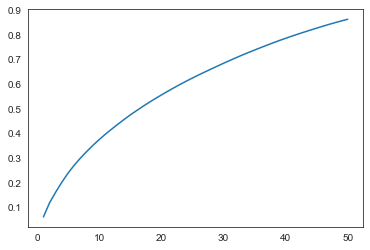

In [19]:
plt.plot(np.arange(1,n+1),np.cumsum(pca_pipe['pca'].explained_variance_ratio_))

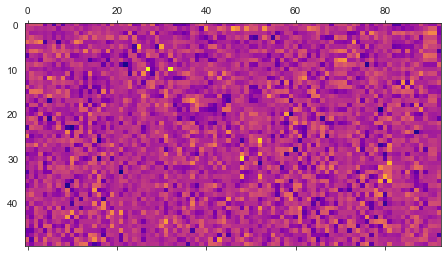

In [20]:
plt.matshow(pca_pipe['pca'].components_, cmap = 'plasma')
plt.show()

## Classification

### Nearest Neighbors

In [21]:
neigh_pipe = Pipeline([('scaler',StandardScaler()),('neigh',KNeighborsClassifier(n_neighbors = 9))])
neigh_pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('neigh',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=9, p=2,
                                      weights='uniform'))],
         verbose=False)

In [22]:
pred = neigh_pipe.predict(X_test)

In [23]:
sum(pred==y_test)/len(y_test)

0.8795811518324608

### Decision Tree

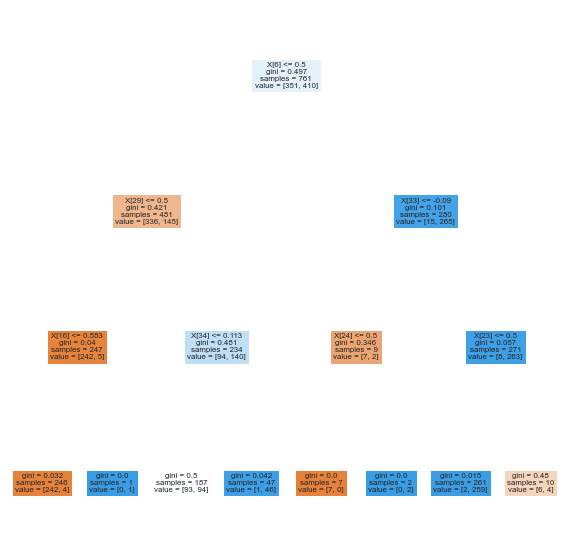

In [24]:
tree_clf = DecisionTreeClassifier(max_depth = 3)
fig, ax = plt.subplots(figsize=(10, 10))
fig = tree_clf.fit(X_train, y_train)
tree.plot_tree(fig,filled = True,ax=ax)
plt.show()

In [25]:
pred = tree_clf.predict(X_test)
sum(pred==y_test)/len(y_test)

0.8952879581151832

In [27]:
[X.columns[i] for i in [5,29,33,16,34,24,23]]

['wk_side_fianchetto',
 'B#',
 'w_development_side',
 'wdoubled_r',
 'wc_earliness',
 'B',
 'A']

So the decision tree is finding that the opening is pretty important for prediction

### Custom: by opening

For each opening type (A,B,C,D,E) I'll classify it as Rosen or Russian (based on who did that opening the most often). Then check how predictive that is.

In [28]:
rosen_openings = [0,0,0,0,0]
rosen_train = X_train.loc[y_train == 'Rosen']
rosen_openings[0] = sum(rosen_train['A'] == 1) / len(rosen_train)
rosen_openings[1] = sum(rosen_train['B'] == 1) / len(rosen_train)
rosen_openings[2] = sum(rosen_train['C'] == 1) / len(rosen_train)
rosen_openings[3] = sum(rosen_train['D'] == 1) / len(rosen_train)
rosen_openings[3] = sum(rosen_train['E'] == 1) / len(rosen_train)
rosen_openings

[0.37606837606837606,
 0.2905982905982906,
 0.1623931623931624,
 0.005698005698005698,
 0]

In [29]:
russian_openings = [0,0,0,0,0]
russian_train = X_train.loc[y_train == 'Russian']
russian_openings[0] = sum(russian_train['A'] == 1) / len(russian_train)
russian_openings[1] = sum(russian_train['B'] == 1) / len(russian_train)
russian_openings[2] = sum(russian_train['C'] == 1) / len(russian_train)
russian_openings[3] = sum(russian_train['D'] == 1) / len(russian_train)
russian_openings[3] = sum(russian_train['E'] == 1) / len(russian_train)
russian_openings

[0.012195121951219513,
 0.6829268292682927,
 0.3024390243902439,
 0.0024390243902439024,
 0]

In [30]:
opening_pred = ['','','','','']
for i in range(5):
    if rosen_openings[i] > russian_openings[i]:
        opening_pred[i] = 'Rosen'
    else:
        opening_pred[i] = 'Russian'
opening_pred

['Rosen', 'Russian', 'Russian', 'Rosen', 'Russian']

In [31]:
pred = y_test.copy()
for i in range(len(X_test)):
    openings = list(X_test[['A','B','C','D','E']].iloc[i])
    opening_index = np.argmax(openings)
    pred.iloc[i] = opening_pred[opening_index]

In [32]:
pred

1298    Russian
372       Rosen
440       Rosen
1676    Russian
1308    Russian
         ...   
1397    Russian
1873    Russian
1190    Russian
1788    Russian
827     Russian
Name: white_player, Length: 191, dtype: object

In [33]:
sum(pred==y_test)/len(y_test)

0.7905759162303665

In [34]:
import sklearn

guesses = pred
actual = y_test

labels = ['Rosen','Russian']

c_matrix = np.round(sklearn.metrics.confusion_matrix(actual,guesses,labels = labels) / len(y_test),2)

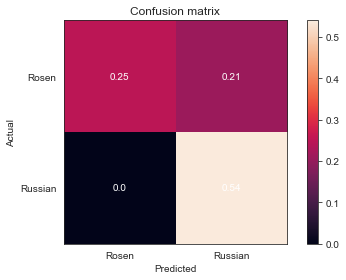

In [35]:
fig, ax = plt.subplots()
im = ax.imshow(c_matrix)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Axes labels
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, c_matrix[i, j],
                       ha="center", va="center", color="w")

fig.colorbar(im)
        
ax.set_title("Confusion matrix")
fig.tight_layout()
plt.show()

# Stratifying by opening

Given how well the opening predicted the player, let's try improving that by training data of a single classifier on each separate opening.

Matt said it's better not to do this I think, bc we wanna limit the number of separate classifiers we train. But fuck it, let's see if it works first.

Need to
- See how many of each type of opening there are, i.e. do we have enough data to stratify
- Try it on one opening first, and compare with the naive prediction from the pure-opening classifier

Maybe with train_test_split we can do this stratifying at the start

In [39]:
letters = ['A','B','C','D','E']
stratified = [df_copy[df_copy[letter] == 1] for letter in letters]

In [40]:
[len(letter_data) for letter_data in stratified]

[170, 467, 237, 73, 5]

In [41]:
len(df_copy)

952

In [42]:
[[len(letter_data[letter_data['white_player'] == 'Rosen']),len(letter_data[letter_data['white_player'] == 'Russian'])] for letter_data in stratified]

[[165, 5], [120, 347], [77, 160], [73, 0], [4, 1]]

I'll train it on the B data, I'm trying to beat the naive:

In [43]:
347/(347+120)

0.7430406852248393

In [44]:
B_df = stratified[1]
B_df.head()

,game_id,white_player,wn_pair,wn_outpost,wn_repositioning,wn_mobility,wb_pair,wk_side_fianchetto,wq_side_fianchetto,wb_mobility,...,num_direct_trades,num_indirect_trades,num_direct_trades_white,num_indirect_trades_white,avg_time_between_direct_trade,exchanges_possible,king_squares_attacked,king_moves,king_moves_weighted,distance_from_king
2,https://lichess.org/5eppQZDZ,Rosen,0,0.428571,0.470635,1.628571,0,0,0,3.542857,...,5,0,3,0,1.5,0.535714,0.657143,0,0,3.555586
3,https://lichess.org/L9DC3KN3,Rosen,0,0.000000,0.046737,3.692308,0,0,0,1.846154,...,3,0,1,0,1.0,0.571429,0.000000,0,0,3.516140
12,https://lichess.org/zmgap7Xk,Rosen,0,0.029412,0.660155,2.088235,0,0,0,3.852941,...,5,1,2,0,1.0,0.480000,0.382353,0,0,3.250023
13,https://lichess.org/TksYEEUz,Rosen,0,0.173913,0.265878,3.413043,0,0,0,2.695652,...,4,0,2,0,1.0,0.750000,0.217391,1,36,3.607861
39,https://lichess.org/sESYcNRo,Rosen,0,0.315789,0.341689,1.578947,0,1,0,1.973684,...,5,1,1,1,1.5,0.411765,0.894737,1,20,3.445705


In [45]:
# The opening columns give us no info, remove all but A#
X_B = B_df.drop(columns = ['game_id','white_player','A','B','C','D','E','B#','C#','D#','E#'])
y_B = B_df['white_player']
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B,y_B,test_size = 0.2,stratify=y_B)

In [47]:
len(X_B_train)

373

### PCA

In [48]:
n = 50
pca_pipe = Pipeline([('scale',StandardScaler()), ('pca',PCA(n_components = n))])
X_B_train_pipe = pca_pipe.fit_transform(X_B_train,y_B_train)

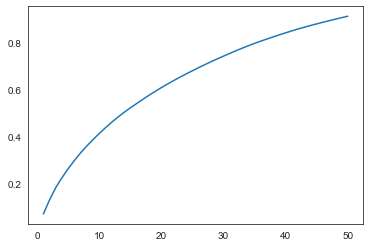

In [49]:
plt.plot(np.arange(1,n+1),np.cumsum(pca_pipe['pca'].explained_variance_ratio_))

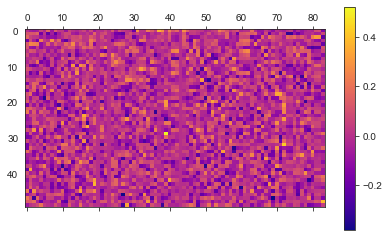

In [50]:
plt.matshow(pca_pipe['pca'].components_, cmap = 'plasma')
plt.colorbar()
plt.show()

### K nearest neighbors

In [51]:
neigh_pipe = Pipeline([('scaler',StandardScaler()),('neigh',KNeighborsClassifier(n_neighbors = 5))])
neigh_pipe.fit(X_B_train,y_B_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('neigh',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [52]:
pred = neigh_pipe.predict(X_B_test)
sum(pred==y_B_test)/len(y_B_test)

0.8191489361702128

It beats the naive 74% classification!

### Decision tree

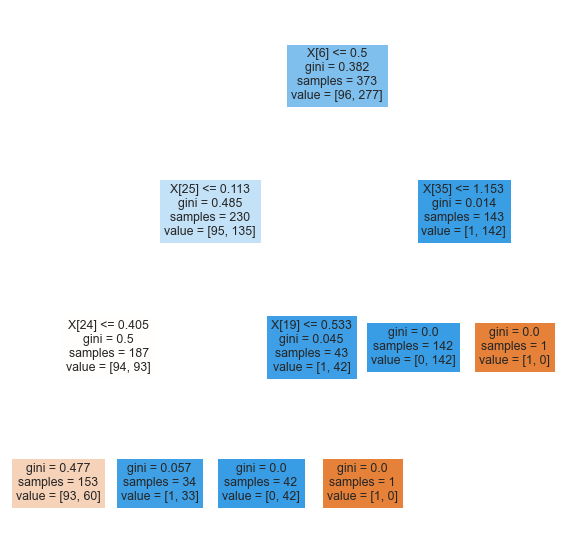

In [53]:
tree_clf = DecisionTreeClassifier(max_depth = 3)
fig, ax = plt.subplots(figsize=(10, 10))
fig = tree_clf.fit(X_B_train, y_B_train)
tree.plot_tree(fig,filled = True,ax=ax)
plt.show()

In [54]:
[X_B.columns[i] for i in [6,25,35,24,19]]

['wq_side_fianchetto',
 'wc_earliness',
 'wp_tension',
 'w_development_side',
 'wq_aggression']

In [55]:
pred = tree_clf.predict(X_B_test)
sum(pred==y_B_test)/len(y_B_test)

0.7978723404255319

In [57]:
B_num_rosen = X_B[y_B == 'Rosen']['wq_side_fianchetto']
B_num_russian = X_B[y_B == 'Russian']['wq_side_fianchetto']

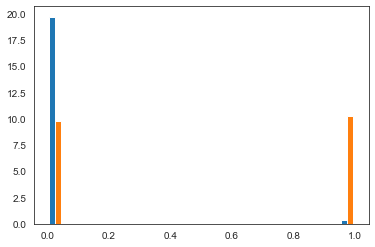

In [58]:
plt.hist([B_num_rosen,B_num_russian],bins = 20, density = True)
plt.show()

The Russian likes to queen fianchetto lol

### Random forest

In [59]:
forest_clf = RandomForestClassifier(max_depth = 4)
forest_clf.fit(X_B_train,y_B_train)
pred = forest_clf.predict(X_B_test)
sum(pred == y_B_test)/len(y_B_test)

0.8085106382978723

In [60]:
names = []
scores = []
for name, score in zip(X_B_train.columns,forest_clf.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df = score_df.sort_values('importance_score',ascending=False)

In [123]:
score_df.head(20)

,feature,importance_score
23,A#,0.1246
5,wk_side_fianchetto,0.0515
47,wb_attack,0.0367
22,wq_mobility,0.0358
55,wcl_MR,0.0337
12,wn_b_develop_pref,0.0335
46,wb_density,0.0323
34,wp_backward,0.0248
31,wp_center_strength,0.0242
57,wcl_BL,0.0241


Some similarities to the regular decision tree's features

### Let's try SVC

In [61]:
svc_pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel = "rbf", C=1))])
svc_pipe.fit(X_B_train,y_B_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [62]:
pred = svc_pipe.predict(X_B_test)
sum(pred == y_B_test)/len(y_B_test)

0.8829787234042553

## Unsupervised stuff

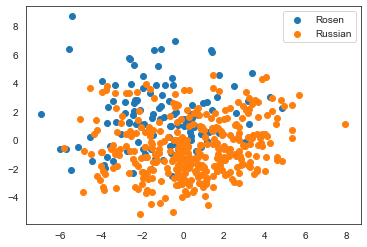

In [63]:
pca_pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components = 2))])
transform = pca_pipe.fit_transform(X_B)

indices = y_B == 'Rosen'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Rosen')
indices = y_B == 'Russian'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Russian')
plt.legend()
plt.show()

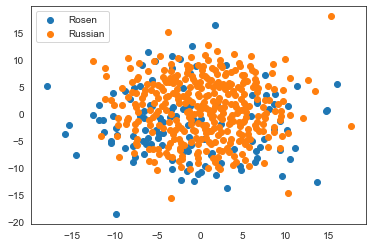

In [65]:
pipe = Pipeline([('scaler',StandardScaler()),('mds',MDS(n_components = 2))])
transform = pipe.fit_transform(X_B)

indices = y_B == 'Rosen'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Rosen')
indices = y_B == 'Russian'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Russian')
plt.legend()
plt.show()

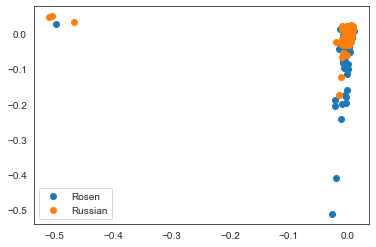

In [70]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('lle',LocallyLinearEmbedding(n_neighbors=50, n_components=2, method='modified', eigen_solver='dense'))])
transform = pipe.fit_transform(X_B)

indices = y_B == 'Rosen'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Rosen')
indices = y_B == 'Russian'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Russian')
plt.legend()
plt.show()

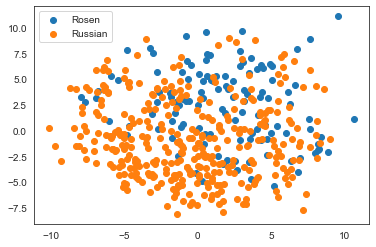

In [71]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('iso',Isomap(n_neighbors=100, n_components=2))])
transform = pipe.fit_transform(X_B)

indices = y_B == 'Rosen'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Rosen')
indices = y_B == 'Russian'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Russian')
plt.legend()
plt.show()

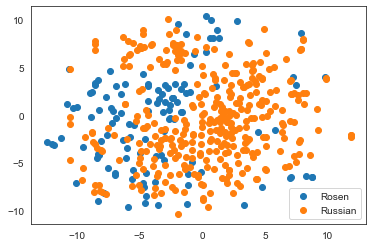

In [72]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('tsne',TSNE(n_components = 2, perplexity=50))])
transform = pipe.fit_transform(X_B)

indices = y_B == 'Rosen'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Rosen')
indices = y_B == 'Russian'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Russian')
plt.legend()
plt.show()

PCA does pretty well with it

# PCA + Classifier?

In [81]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('pca',PCA(n_components = 10)),
                ('svc', SVC(kernel = "rbf", C=1))
                ])
pipe.fit(X_B_train,y_B_train)

pred = pipe.predict(X_B_test)
sum(pred==y_B_test)/len(y_B_test)

0.776595744680851

# Stratified KNN

New strat: make 5 KNN classifiers (one for each opening letter, probably drop the A#-E# thing), see how that goes

In [86]:
# Does this custom classification to a dataframe X
def predict(X):
    # Removing the opening info
    X_thin = X.drop(columns = ['A','B','C','D','E','A#','B#','C#','D#','E#'])
    
    pred = [''] * len(X)
    
    for i in range(len(X)):
        # Get the row we're looking at
        row = X.iloc[i]
        
        # Figure out the index of its opening
        index = -1
        for j in range(len(letters)):
            if row[letters[j]] == 1:
                index = j
                break
        
        # Code for doing the naive guess on E opening stuff, because there's only like 5 data points
        if index == -1:
            pred[i] = 'Rosen'
            continue
        
        # Remove the opening info
        row_thin = X_thin.iloc[i]
        
        # Run the classifier
        pred[i] = pipes[index].predict(row_thin.values.reshape(1,-1))[0]
    
    # Return the predictions
    return pred

In [87]:
n_neighbors = 5
letters = ['A','B','C','D']

# Create the 5 classifiers
pipes = [Pipeline([('scale',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors = n_neighbors))]) for letter in letters]

# Stratify the training data
# Also making sure to remove info about the opening
X_train_thin = X_train.drop(columns = ['A','B','C','D','E','A#','B#','C#','D#','E#'])
X_train_stratified = [X_train_thin[X_train[letter] == 1] for letter in letters]
y_train_stratified = [y_train[X_train[letter] == 1] for letter in letters]

# Train the 5 classifiers
for i in range(len(letters)):
    pipes[i].fit(X_train_stratified[i],y_train_stratified[i])

# Predict
pred = predict(X_test)
sum(pred==y_test)/len(y_test)

0.8952879581151832

In [88]:
letters = ['A','B','C','D']

# Create the 5 classifiers
pipes = [Pipeline([('scale',StandardScaler()),('rf',RandomForestClassifier(max_depth = 3))]) for letter in letters]

# Stratify the training data
# Also making sure to remove info about the opening
X_train_thin = X_train.drop(columns = ['A','B','C','D','E','A#','B#','C#','D#','E#'])
X_train_stratified = [X_train_thin[X_train[letter] == 1] for letter in letters]
y_train_stratified = [y_train[X_train[letter] == 1] for letter in letters]

# Train the 5 classifiers
for i in range(len(letters)):
    pipes[i].fit(X_train_stratified[i],y_train_stratified[i])

# Predict
pred = predict(X_test)
sum(pred==y_test)/len(y_test)

0.9267015706806283

Pretty great. Now that I've run the same analysis as I did on Magnus-Nihal and showed it works better here, let's do some actual general classification.

# Actual Good Classification

In [138]:
# ('knn',KNeighborsClassifier(n_neighbors = 5))
# ('svc', SVC(kernel = "rbf", C=1))
pipe = Pipeline([('scaler',StandardScaler()),
                 #('pca',PCA(n_components = 10)),
                 ('svc', SVC(kernel = "rbf", C=1))
                ])
pipe.fit(X_train,y_train)

pred = pipe.predict(X_test)
sum(pred==y_test)/len(y_test)

0.9214659685863874

In [139]:
import sklearn

guesses = pred
actual = y_test

labels = ['Rosen','Russian']

c_matrix = np.round(sklearn.metrics.confusion_matrix(actual,guesses,labels = labels) / len(y_test),2)

<IPython.core.display.Javascript object>


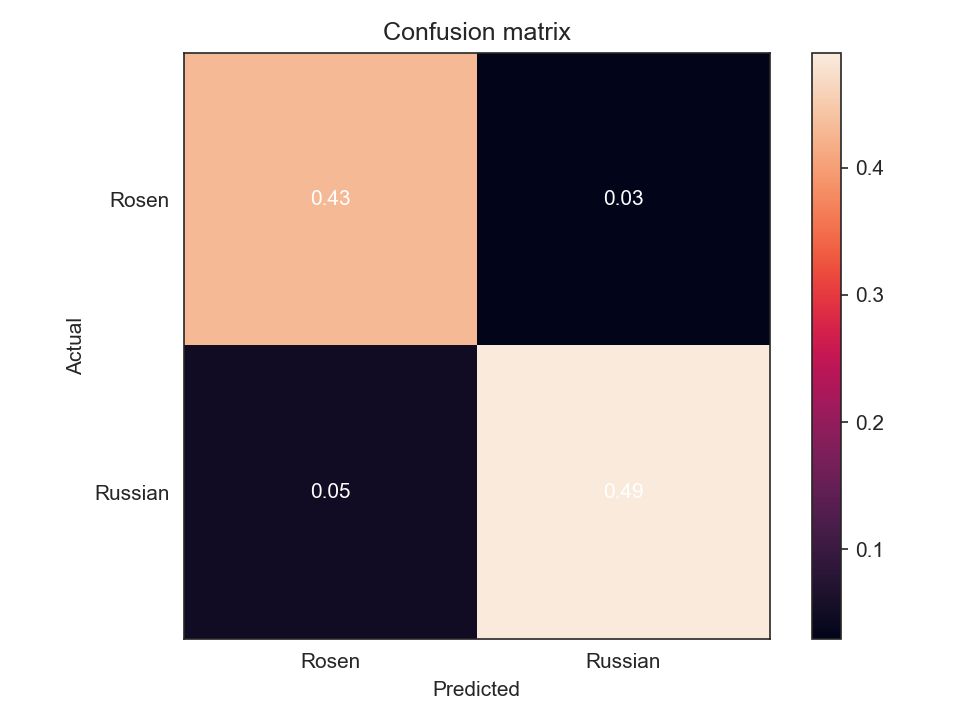

In [140]:
fig, ax = plt.subplots()
im = ax.imshow(c_matrix)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Axes labels
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, c_matrix[i, j],
                       ha="center", va="center", color="w")

fig.colorbar(im)
        
ax.set_title("Confusion matrix")
fig.tight_layout()
plt.show()

This is ~15% better than the naive method (74% accurate) of guessing whichever IM does the opening the most often

I'd say this is a win, let's bring in the whole data set and try to tell apart Rosen-Russian-Other

In [141]:
df = pd.read_csv('rosen_russian.csv')
df_copy = df.copy()

In [142]:
# Simplify the white player labels
for i in range(len(df_copy)):
    name = df_copy['white_player'].at[i]
    if name == 'EricRosen':
        df_copy['white_player'].at[i] = 'Rosen'
    elif name == 'RussianBlizzard':
        df_copy['white_player'].at[i] = 'Russian'
    else:
        df_copy['white_player'].at[i] = 'Other'

In [143]:
# Make the data and features, train/test split
X = df_copy.drop(columns = ['game_id','white_player'])
y = df_copy['white_player']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)
X_train.head()

,wn_pair,wn_outpost,wn_repositioning,wn_mobility,wb_pair,wk_side_fianchetto,wq_side_fianchetto,wb_mobility,wlong_diagonal_control,wopposite_color_b,...,num_direct_trades,num_indirect_trades,num_direct_trades_white,num_indirect_trades_white,avg_time_between_direct_trade,exchanges_possible,king_squares_attacked,king_moves,king_moves_weighted,distance_from_king
1271,0,0.090909,0.046189,0.363636,1,0,0,2.393939,0.000000,0,...,5,0,1,0,1.5,1.700000,1.000000,0,0,3.144972
1099,0,0.000000,0.115314,1.130435,1,0,1,3.065217,0.652174,0,...,5,0,2,0,1.0,0.192308,0.434783,0,0,3.417192
489,0,0.000000,0.020748,2.863636,0,0,1,2.238636,0.227273,-1,...,4,0,3,0,1.0,0.333333,0.750000,1,34,3.237065
1707,0,0.000000,0.005642,0.644737,0,0,0,2.947368,0.000000,-1,...,7,0,3,0,1.0,0.250000,0.684211,1,20,3.271993
1764,0,0.000000,0.050412,1.230769,1,0,1,2.153846,0.538462,0,...,3,0,1,0,1.0,0.370370,0.000000,1,39,3.309993


In [144]:
y_train.head()

1271      Other
1099    Russian
489       Other
1707    Russian
1764    Russian
Name: white_player, dtype: object

<IPython.core.display.Javascript object>


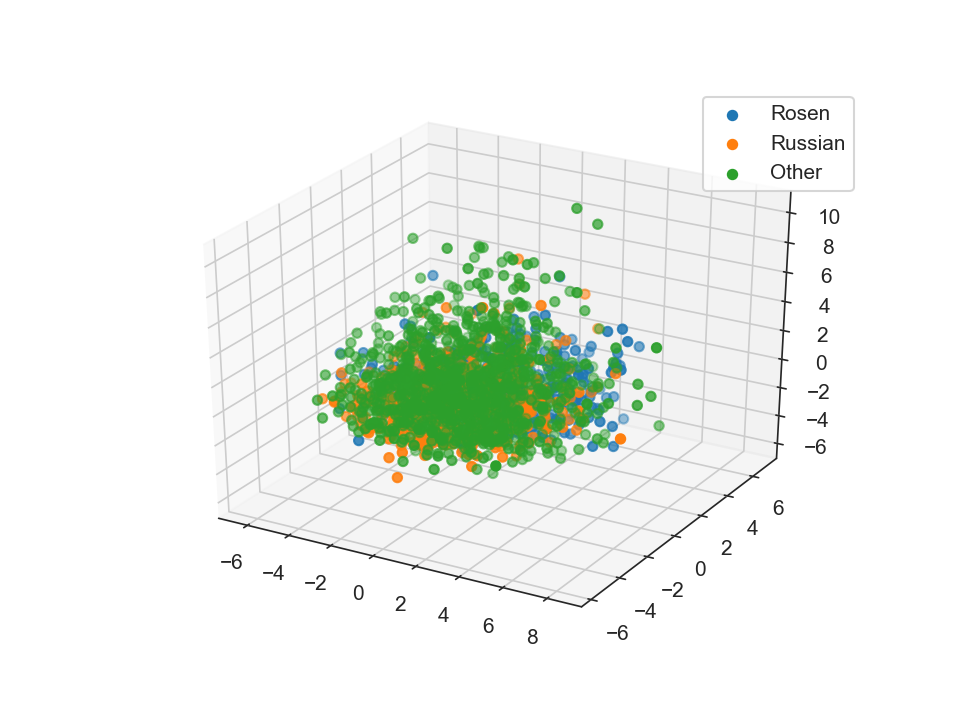

In [145]:
%matplotlib notebook

pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components = 3))])
transform = pipe.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in ['Rosen','Russian','Other']:
    indices = y == label
    ax.scatter(transform[indices][:,0],transform[indices][:,1],transform[indices][:,2],label=label)
ax.legend()
plt.show()

In [ ]:
%matplotlib inline

In [146]:
# ('knn',KNeighborsClassifier(n_neighbors = 5))
# ('svc', SVC(kernel = "rbf", C=1))
pipe = Pipeline([('scaler',StandardScaler()),
                 #('pca',PCA(n_components = 20)),
                 ('svc', SVC(kernel = "rbf", C=1))
                ])
pipe.fit(X_train,y_train)

pred = pipe.predict(X_test)
sum(pred==y_test)/len(y_test)

0.7840616966580977

In [147]:
import sklearn

guesses = pred
actual = y_test

labels = ['Rosen','Russian','Other']

c_matrix = np.round(sklearn.metrics.confusion_matrix(actual,guesses,labels = labels) / len(y_test),2)

<IPython.core.display.Javascript object>


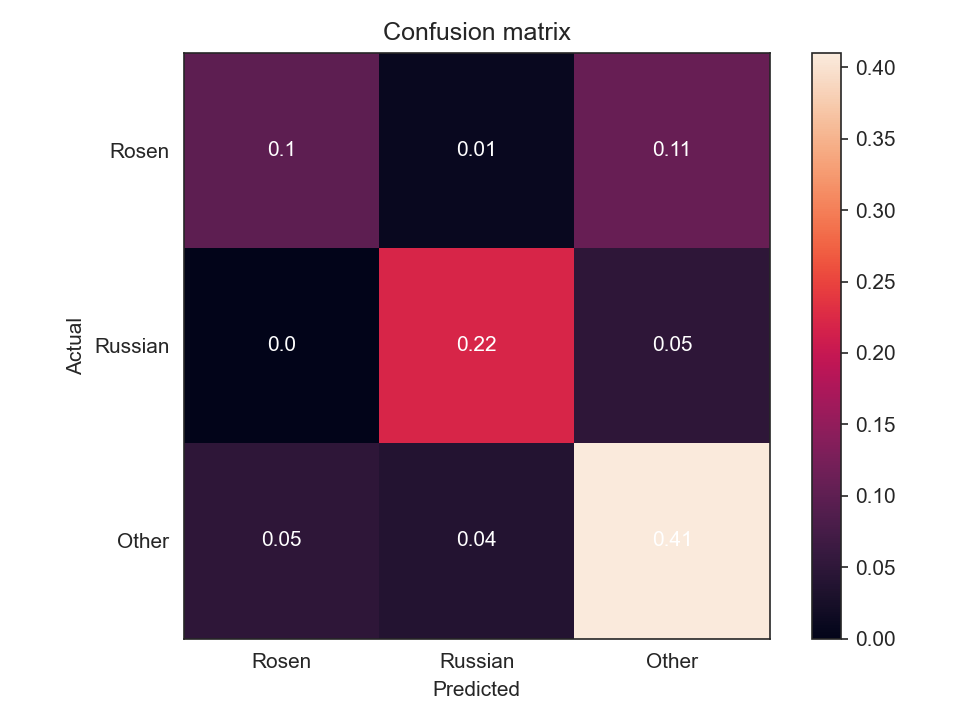

In [115]:
fig, ax = plt.subplots()
im = ax.imshow(c_matrix)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Axes labels
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, c_matrix[i, j],
                       ha="center", va="center", color="w")

fig.colorbar(im)
        
ax.set_title("Confusion matrix")
fig.tight_layout()
plt.show()

I mean, not great because it isn't predicting Rosen as much as you'd hope (you'd want ~25%)

But it's 73% accurate and has the least confusion on Rosen-Russian decisions

Plus, 'Other' is a really broad category